### fashion_mnist分类

In [1]:
import numpy as np
import tensorflow as tf
import os
import keras

In [2]:
print(tf.__version__)

2.2.0


**加载本地fashion_mnist数据集**

下载到本地的数据集一般有两种格式：numpy的压缩格式.npz，以及gzip压缩格式.gz

1、加载npz格式数据集

In [3]:
def load_npz_data(data_path):
    data = np.load(data_path)
    x_train, y_train, x_test, y_test =  data['x_train'],data['y_train'],data['x_test'],data['y_test']

    # 可以将其中一条数据保存成txt文件，查看一下，会对这组数据有个直观的感受
    # np.savetxt('test.txt',x_train[0],fmt='%3d',newline='\n\n')
    
    # 将数据归一化
    x_train, x_test = x_train/255.0, x_test/255.0

    return x_train, y_train, x_test, y_test

2、加载gz格式数据集

In [4]:
def load_gz_data(data_path):
    import os
    import gzip

    # 定义加载数据的函数，data_path为保存gz数据的文件夹，该文件夹下有4个文件
    # 'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
    # 't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'

    files = [
      'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
      't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'
    ]
    paths = []
    for fname in files:
        paths.append(os.path.join(data_path,fname))

    with gzip.open(paths[0], 'rb') as lbpath:
        y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[1], 'rb') as imgpath:
        x_train = np.frombuffer(
            imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)

    with gzip.open(paths[2], 'rb') as lbpath:
        y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[3], 'rb') as imgpath:
        x_test = np.frombuffer(
            imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 28, 28)

    return (x_train, y_train), (x_test, y_test)

#### 加载fashin_mnist数据集

In [5]:
(train_images, train_labels), (test_images, test_labels) = load_gz_data("E:/02Studying/03DeepLearning/dataset/fashin_mnist")

显示部分fashin_mnist数据集

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187
   26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237
  255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234
  238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0   0 194 

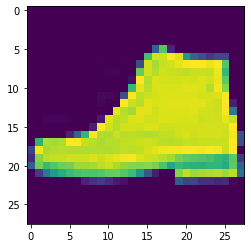

In [6]:
import matplotlib.pyplot as plt
plt.imshow(train_images[42])
print(train_labels[42])
print(train_images[42])

#### 归一化数据
归一化数据，使数据处于0到1之间

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#### 设计模型
输入层 --> 隐藏层 --> 输出层

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),         # 扁平化，将数据展开为一维数据
    keras.layers.Dense(128, activation=tf.nn.relu),     # 隐藏层
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#### 回调函数
用于检查损失是否小于某个值，如果小于，则停止训练

In [9]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss') < 0.01):
            print("\nLoss is low so cancelling training!")
            self.model.stop_training = True

In [10]:
callbacks = myCallback()    #实例化回调函数类

#### 设置优化器和损失函数

In [11]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy')
model.fit(train_images, train_labels, epochs=100, callbacks=[callbacks])

Epoch 1/100
1875/1875 [==============================] - 2s 811us/step - loss: 0.4966
Epoch 2/100
1875/1875 [==============================] - 1s 781us/step - loss: 0.3714
Epoch 3/100
1875/1875 [==============================] - 1s 760us/step - loss: 0.3334
Epoch 4/100
1875/1875 [==============================] - 1s 774us/step - loss: 0.3120
Epoch 5/100
1875/1875 [==============================] - 1s 753us/step - loss: 0.2938
Epoch 6/100
1875/1875 [==============================] - 1s 755us/step - loss: 0.2808
Epoch 7/100
1875/1875 [==============================] - 1s 783us/step - loss: 0.2694
Epoch 8/100
1875/1875 [==============================] - 1s 777us/step - loss: 0.2563
Epoch 9/100
1875/1875 [==============================] - 1s 748us/step - loss: 0.2465
Epoch 10/100
1875/1875 [==============================] - 1s 758us/step - loss: 0.2379
Epoch 11/100
1875/1875 [==============================] - 1s 762us/step - loss: 0.2296
Epoch 12/100
1875/1875 [============================

#### 验证集

In [12]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 681us/step - loss: 0.7673


0.7673160433769226